In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

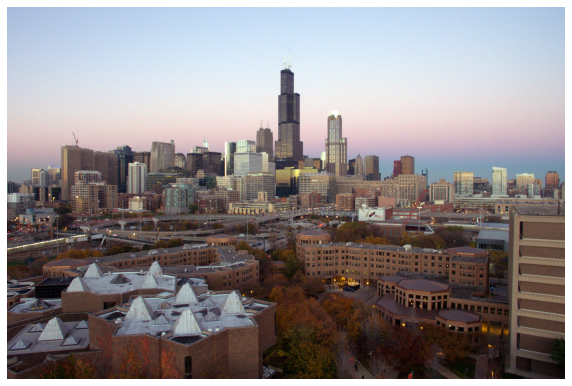

In [2]:
img_bld = cv2.imread('blds.png')
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bld, cv2.COLOR_BGR2RGB))

# Extract Axis Aligned Patch

In [3]:
'''
Part(a) axis aligned patch
'''
def axis_aligned_patch(image, center, height, width, ch =3):    
    patch = np.empty([height, width, ch])
    # insert code to crop the image at the center with height width specified
    return patch

In [4]:
'''
Part(b) oriented patch extraction on default canvas
'''
def rotate_image(image, center, angle):
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)  
    out_shape = np.asarray(image.shape[1::-1])
    result = cv2.warpAffine(image, rot_mat, out_shape)
    return result

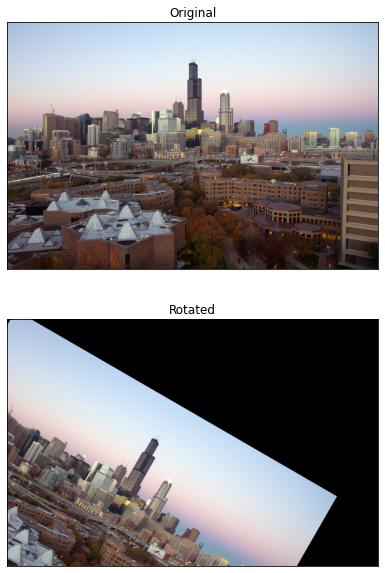

In [5]:
rot_center = tuple(0.1*np.array(img_bld.shape[1::-1]) / 2)
rot_angle = -30
dst = rotate_image(img_bld,rot_center,rot_angle)


plt.figure(figsize = [20, 10])
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img_bld, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Part(b) oriented patch extraction on sufficiently sized canvas
'''

def rotate_bound(image, center, angleInDegrees):
    # grab the dimensions of the image and then determine the
    # center
    print(center)
    
    (h, w) = image.shape[:2]
    print('width:',w,'\n','height:',h)
    cX = center[0]
    cY = center[1]
    
    # calculate the rotation matrix in the same way as before
    M = cv2.getRotationMatrix2D(center, angleInDegrees, 1.0)
    
    
    
    # Part c(i) compute the new dimensions of the canvas nH, nW (this is H0, W0 is the assignment pdf)     
    nW = w
    nH = h
    
    # Part c(ii) adjust the rotation matrix to take into account translation by 
    # calculating vertices of given image and patch
    
    topmost = 0
    leftmost = 0
    
    newpatch_coords = np.zeros([2,4])
    
    # Part c(iii) adjust the rotation matrix using T0    
    M[0,2] += 0 #translate x center to topmost
    M[1,2] += 0 #translate y center to leftmost
       

    warped_img = cv2.warpAffine(image, M, (nW, nH))
    print('nW=',nW,'\n','nH=',nH,'\n','cX=\n',cX,'cY=\n',cY,'M=',M)
    # perform the actual rotation and return the image
    return warped_img, newpatch_coords


(90.0, 60.0)
width: 1800 
 height: 1200
nW= 2158 
 nH= 1939 
 cX=
 90.0 cY=
 60.0 M= [[ 8.66025404e-01 -5.00000000e-01  6.00000000e+02]
 [ 5.00000000e-01  8.66025404e-01  0.00000000e+00]]


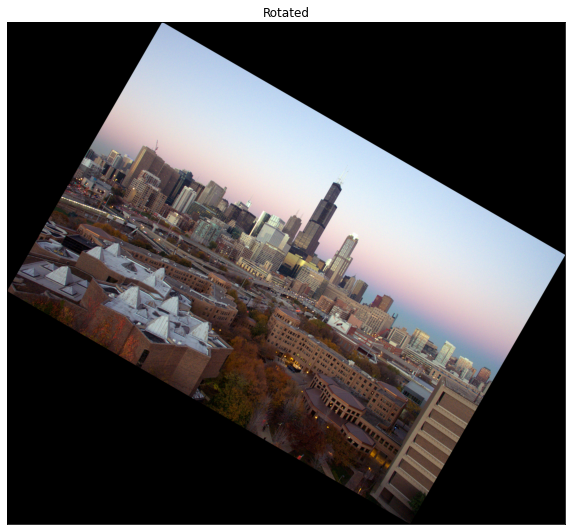

In [7]:
dst, _ = rotate_bound(img_bld,rot_center,rot_angle)

plt.figure(figsize = [10, 10])
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()

/tmp/ipykernel_2768123/2814924457.py:5: RuntimeWarning: invalid value encountered in cast
  plt.imshow(cv2.cvtColor(patch.astype(np.uint8), cv2.COLOR_BGR2RGB))


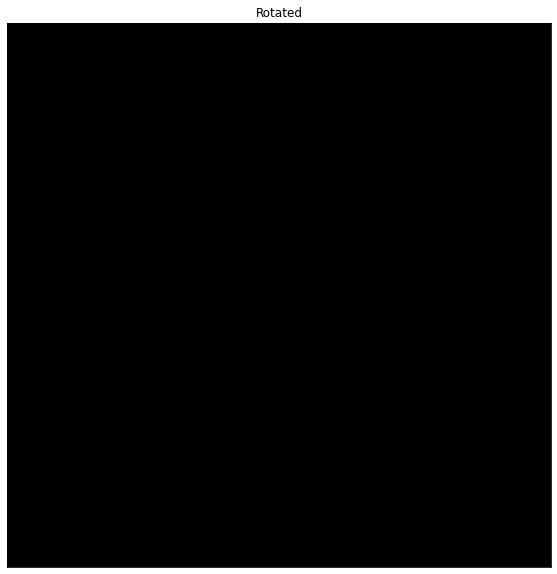

In [8]:
# Part c(iv) insert code to extract patch from this new canvas

patch = axis_aligned_patch(dst, np.asarray([10,10]), 10, 10)
plt.figure(figsize = [10, 10])
plt.imshow(cv2.cvtColor(patch.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()